In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt

# Model h_1b^4

In [31]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([1, 1])*1/N), ('B', np.array([-1, -1])*1/N), ('C', np.array([1, -1])*1/N), ('D', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 1
tx = 0.2
ty = 0.3
lattice.add_hoppings(
    ([0, 0], 'A', 'D', tx),
    ([0, 0], 'A', 'C', ty),
    ([0, 0], 'B', 'C', tx),
    ([0, 0], 'B', 'D', ty),
    ([1, 0], 'A', 'D', t),
    ([0, 1], 'A', 'C', t),
    ([0, -1], 'B', 'D', t),
    ([-1, 0], 'B', 'C', t),

)

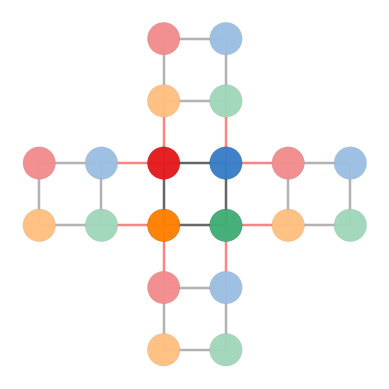

In [33]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=1,
          hopping = {
  "width": 3,
})
plt.gca().axis('off');

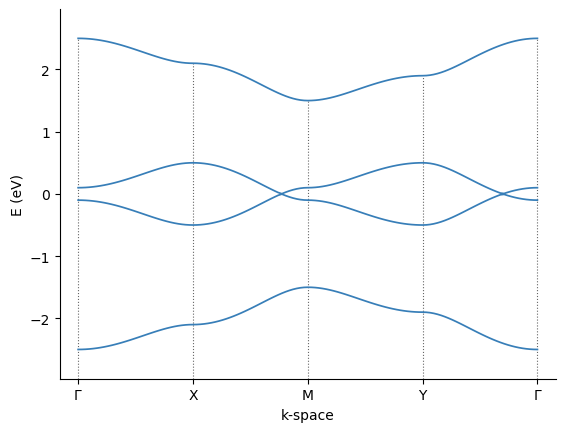

In [34]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

In [35]:
R4 = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0]])
R2 = np.einsum("ij, jk -> ik", R4, R4)

In [36]:
solver.set_wave_vector(Gamma)
evectors = solver.eigenvectors
print(f"Gamma eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(X)
evectors = solver.eigenvectors
print(f"X eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(Y)
evectors = solver.eigenvectors
print(f"Y eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(M)
evectors = solver.eigenvectors
print(f"M eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")

Gamma eigenvalues for R2: [ 1.+0.j -1.+0.j -1.+0.j  1.+0.j]
X eigenvalues for R2: [-1.+0.j  1.+0.j  1.+0.j -1.+0.j]
Y eigenvalues for R2: [-1.+0.j  1.+0.j  1.+0.j -1.+0.j]
M eigenvalues for R2: [ 1.+0.j -1.+0.j -1.+0.j  1.+0.j]


# Model h_2c^4

In [53]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), ('B', np.array([-1, 0])*1/N), ('C', np.array([0, -1])*1/N), ('D', np.array([1, 0])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 1
tx = 0.1
ty = 0.2
lattice.add_hoppings(
    ([0, 0], 'A', 'C', ty),
    ([0, 0], 'B', 'D', tx),
    ([0, 1], 'A', 'C', t),
    ([1, 0], 'D', 'B', t),
)

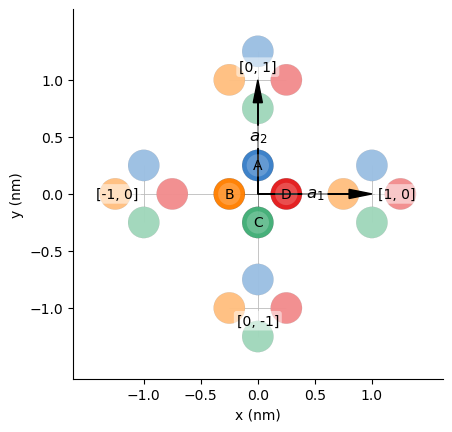

In [54]:
lattice.plot()

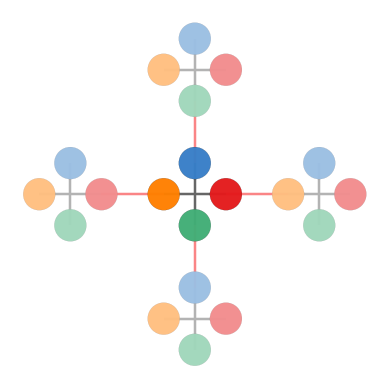

In [55]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=1,
          hopping = {
  "width": 3,
})
plt.gca().axis('off');

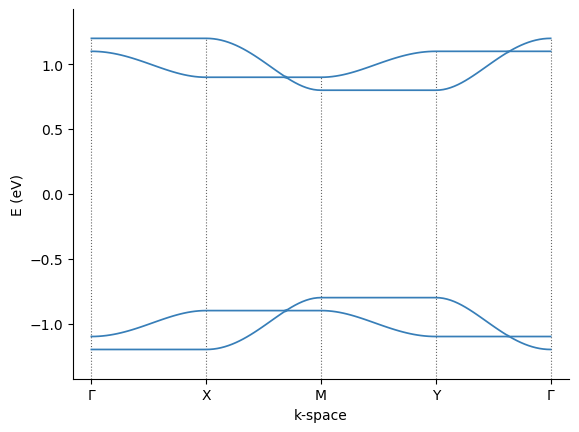

In [56]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

In [58]:
R4 = np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
R2 = np.einsum("ij, jk -> ik", R4, R4)

In [59]:
solver.set_wave_vector(Gamma)
evectors = solver.eigenvectors
print(f"Gamma eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(X)
evectors = solver.eigenvectors
print(f"X eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(Y)
evectors = solver.eigenvectors
print(f"Y eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")
solver.set_wave_vector(M)
evectors = solver.eigenvectors
print(f"M eigenvalues for R2: {np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)}")

Gamma eigenvalues for R2: [-1.+0.j -1.+0.j  1.+0.j  1.+0.j]
X eigenvalues for R2: [-1.+0.j  1.+0.j -1.+0.j  1.+0.j]
Y eigenvalues for R2: [-1.+0.j  1.+0.j -1.+0.j  1.+0.j]
M eigenvalues for R2: [ 1.+0.j  1.+0.j -1.+0.j -1.+0.j]


# Stacking two models

In [121]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), ('B', np.array([-1, 0])*1/N), ('C', np.array([0, -1])*1/N), ('D', np.array([1, 0])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 1
tx = 0
ty = 0.3
lattice.add_hoppings(
    ([0, 0], 'A', 'C', ty),
    ([0, 0], 'B', 'D', tx),
    ([0, 1], 'A', 'C', t),
    ([1, 0], 'D', 'B', t),
)
lattice.add_sublattices(
    ('AA', np.array([1, 1])*1/N), ('BB', np.array([-1, -1])*1/N), ('CC', np.array([1, -1])*1/N), ('DD', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)

lattice.add_hoppings(
    ([0, 0], 'AA', 'DD', tx),
    ([0, 0], 'AA', 'CC', ty),
    ([0, 0], 'BB', 'CC', tx),
    ([0, 0], 'BB', 'DD', ty),
    ([1, 0], 'AA', 'DD', t),
    ([0, 1], 'AA', 'CC', t),
    ([0, -1], 'BB', 'DD', t),
    ([-1, 0], 'BB', 'CC', t),

)

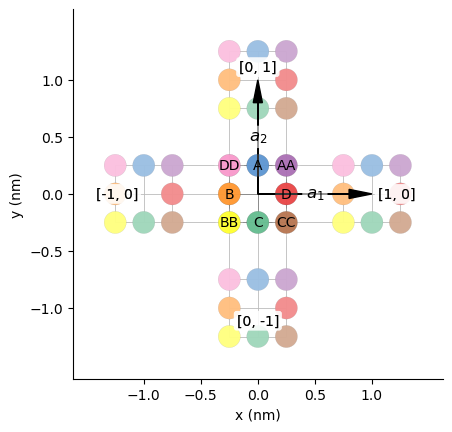

In [123]:
lattice.plot()

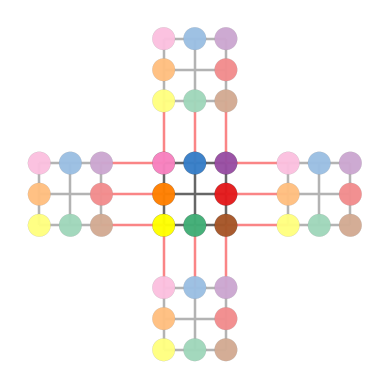

In [101]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=1,
          hopping = {
  "width": 3,
})
plt.gca().axis('off');

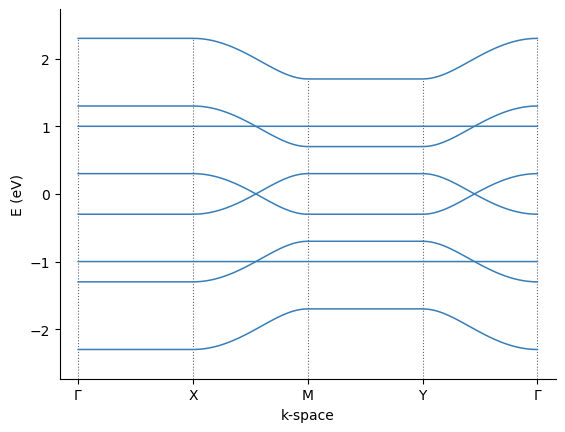

In [104]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])


In [231]:
a1 = np.array([1, 0])
a2 = np.array([0, 1])

lattice = pb.Lattice(a1=a1, a2=a2)

N = 4
M = 30
cladding = 5
for i in range(-M, M):
    for j in range(-M, M):
        if abs(i) > cladding:
            continue
        if abs(j) > cladding: 
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([0, 1])*1/N +i*a1+j*a2), (f'B{i} {j}', np.array([-1, 0])*1/N +i*a1+j*a2),
            (f'C{i} {j}', np.array([0, -1])*1/N+i*a1+j*a2), (f'D{i} {j}', np.array([1, 0])*1/N+i*a1+j*a2))
        lattice.add_sublattices(
            (f'AA{i} {j}', np.array([1, 1])*1/N+i*a1+j*a2), (f'BB{i} {j}', np.array([-1, -1])*1/N+i*a1+j*a2), 
            (f'CC{i} {j}', np.array([1, -1])*1/N+i*a1+j*a2), (f'DD{i} {j}', np.array([-1, 1])*1/N+i*a1+j*a2))

In [232]:
t = 1
tx = 0.01
ty = 0.01
gamma1 = 0.4
gamma2 = 0.1

for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', ty)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'D{i} {j}', tx)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j+1}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'D{i+1} {j}', f'B{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'DD{i} {j}', tx)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'CC{i} {j}', ty)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'CC{i} {j}', tx)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'DD{i} {j}', ty)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'DD{i+1} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'CC{i} {j+1}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'DD{i} {j-1}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'CC{i-1} {j}', t)
        except: 
            pass
        
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'DD{i} {j}', gamma1)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'CC{i} {j}', gamma1)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'BB{i} {j}', gamma2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'D{i} {j}', f'AA{i} {j}', gamma2)
        except: 
            pass

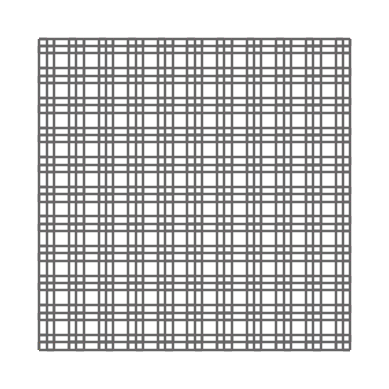

In [233]:
model = pb.Model(
    lattice,
)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})
plt.gca().axis('off');

In [234]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues
prob_gap_two = solver.calc_probability(range(0, 3*(2*cladding+1)**2-3))

In [235]:
dat_gap_two = np.array([])
for i in range(0, int(prob_gap_two.num_sites/8)):
    dat_gap_two = np.append(dat_gap_two, sum(prob_gap_two.data[i*8:8*(i+1)]) - 3) 

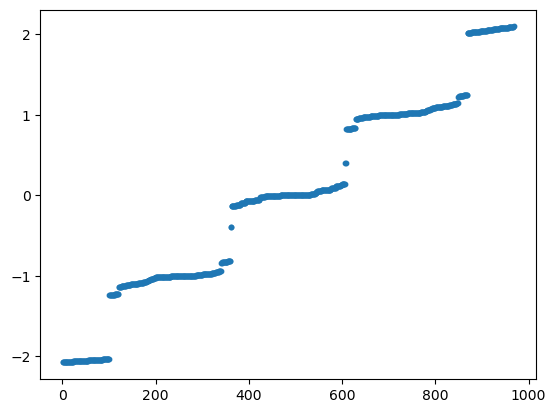

In [244]:
plt.scatter(range(1, np.size(bands)+1), bands, s=10)
#plt.xlim(140, 150)

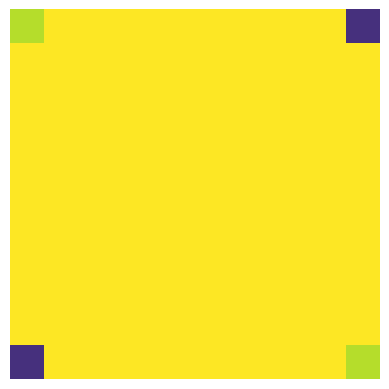

In [258]:
plt.imshow(np.reshape(dat_gap_two, (2*cladding+1, 2*cladding+1)), vmin=-0.8, vmax=-0.7)
plt.gca().axis('off');

In [238]:
dat_reshaped = np.reshape(dat_gap_two, (2*cladding+1, 2*cladding+1))

In [256]:
np.round(np.mod(dat_reshaped[int(cladding*2),0]+ dat_reshaped[0,0], 1), 1)

0.5